## Goal
It is your job to predict if a passenger survived the sinking of the Titanic or not. 
For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

## Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

## Variable Notes
pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

# for this update : 
### i did got back to all of the cells and made sure it works fin after removing the cabin null coverage  

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn.linear_model import LogisticRegression

In [2]:
plt.rc("font", size=14)
sns.set(style="dark") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

## notes

In [3]:
#1- there is colleration between : (survived - sex) ,(survived-pclass) , (survived - Cabin) 
#2 - i think i might find something about there relations by using If-tdf on the name 
#3 - i covered some nans by using the relationship between Cabin and Ticket ( explanation below &&) 
#3 -update :(it seems to fail with a number of  Tickets so i removed it )
#4 - the "Name' is classified by mr,mrs,miss,etc..
#5 - age : the max age is 76.0 # the min age is 0.17
#6 - the only difference between the training and the testing data that the "Survived" column 
# && (when they have the same Fare they will be at the same Cabin section )

In [96]:
training_data=pd.read_csv('Desktop/titanic/train.csv')
testing_data=pd.read_csv('Desktop/titanic/test.csv')
# the testing is same as training but it doesn't have 'Survived' available 

In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
# i will delete the one column that have the nan on 'Fare' for the test_data

#print((pd.isnull(testing_data)).sum())

#testing_data=testing_data.dropna(subset=['Fare'])
#testing_data=testing_data.reset_index()
#print((pd.isnull(testing_data)).sum())

#testing_data.head()
#training_data.head()

In [8]:
'''Class_1=(training_data[training_data['Pclass']==1])# there is 80 Cabins & 98 Age / out of 107 for both of them 
if 'G' in Class_1['Cabin'].unique():
    print('G exists')# there is no G ! , there is A,B,C,D,E,F
    # this means there is no one from Pclass=1 living in the G Cabin 
Class_1=Class_1[Class_1['Fare']>0] # dudged the 'noise' (fare = 0)
Class_1.sort_values('Fare')[100:200].head(3)'''
x=1

In [9]:
'''print((testing_data[testing_data['Pclass']==1]).count())
print('--------------')
print((testing_data[testing_data['Pclass']==2]).count())
print('--------------')
print((testing_data[testing_data['Pclass']==3]).count())'''
x=1

## chaging the 'Sex' from str to numbers 

In [10]:
#training_data.info() # there is null values at : 'Age' , 'Cabin' , 'Embarked'

#converting male to 1 , female to 0

training_data.loc[training_data['Sex']=='male','Sex']=1
training_data.loc[training_data['Sex']=='female','Sex']=0

testing_data.loc[testing_data['Sex']=='male','Sex']=1
testing_data.loc[testing_data['Sex']=='female','Sex']=0


In [11]:
print(len(training_data['Cabin'].unique()))
# there is 148 different cabins i will turn them into 8 cabins  # A,B,C,D,E,F,G,nan
print(pd.isnull(training_data['Cabin']).sum())
training_data.head()

148
687


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [12]:
U=training_data.Ticket.unique()
U

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

# missing with the  'Cabin' Feature

## what is a Cabin 

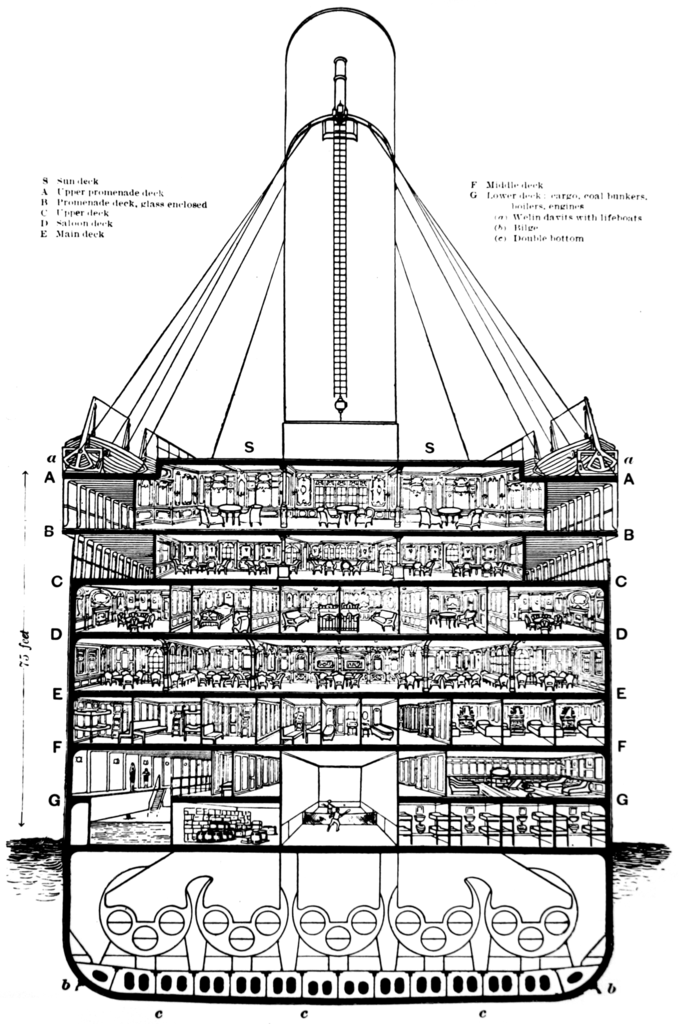

In [13]:
from IPython.display import Image
#Desktop/titanic/train.csv
Image("Desktop/titanic/Cabins.png")

### renamming the Cabin to numbers  to united numbers to to simplify the plottings

In [14]:
# cleaning data 

#renaming the data 'Cabins' to give it the computing ability   #Cabins :

#1- turning the Cabins to a single level system # and turning them into numbers for the calculations 

for i in range(len(training_data)):
    if pd.notnull(training_data.loc[i,'Cabin']):
        if type(training_data.loc[i,'Cabin'])==str:
            
            if 'A' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=1
            elif 'B' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=2
            elif 'C' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=3
            elif 'D' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=4
            elif 'E' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=5
            elif 'F' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=6
            elif 'G' in training_data.loc[i,'Cabin']: 
                training_data.loc[i,'Cabin']=7
    
                 
                
 #2- turning the Cabins on testing_data to a single level system

for i in range(len(testing_data)):
    if pd.notnull(testing_data.loc[i,'Cabin']):
        if type(testing_data.loc[i,'Cabin'])==str:
            

            if 'A' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=1
            elif 'B' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=2
            elif 'C' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=3
            elif 'D' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=4
            elif 'E' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=5
            elif 'F' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=6
            elif 'G' in testing_data.loc[i,'Cabin']: 
                testing_data.loc[i,'Cabin']=7 
#someking of a mistake (someone put a Cabin as T and there is no Cabins called T)
#turning it to nan
#cleaning...
training_data.loc[training_data['Cabin']=='T','Cabin'] = np.nan

#Cabins:                
# 'A' = 1 , 'B'=2 , 'C'=3 , 'D'=4,'E'=5, 'F'=6, 'G'=7
# nan variables on 8

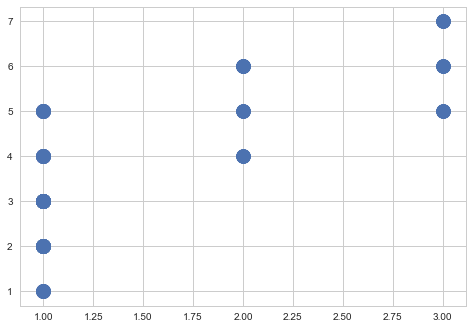

In [15]:
s=plt.scatter(training_data['Pclass']
               ,training_data['Cabin'],s=200 #the size of the dotts
             )



In [16]:
training_data['Cabin'].unique()

array([nan, 3, 5, 7, 4, 1, 2, 6], dtype=object)

In [17]:
print(training_data['Cabin'].unique()) # A,B,C,D,E,F,G,nan converted to 1,2,3,4,5,6,7,8
print(testing_data['Cabin'].unique())


[nan 3 5 7 4 1 2 6]
[nan 2 5 1 3 4 6 7]


In [18]:
print('the training_data nans',pd.isnull(training_data['Cabin']).sum()) # 469
print('the testing_data nans',pd.isnull(testing_data['Cabin']).sum()) # 327

the training_data nans 688
the testing_data nans 327


### i stoped fixing the 'Cabin' nans because the idea that the same tickets have the same Cabin seems to fail after testing it again (the test is below the origional fixing cells)

In [19]:
'''#fixing the nans 

# if there is 2 tickets that have the same Fare cost they will get the same Cabin number 
#1- 
for i in range(len(training_data)):
    if training_data.loc[i,'Fare']>0:
    
        if pd.notnull(training_data.loc[i,'Cabin']):
            Fare=training_data.loc[i,'Fare']
            Cabin=training_data.loc[i,'Cabin']
            for a in range(len(training_data)):
                if Fare==training_data.loc[a,'Fare']:
                    training_data.loc[a,'Cabin']=Cabin

  # fixing the 'Cabin' nans on the training_data by using the testing_data
# cleaning data 

for i in range(len(testing_data)):
    if pd.notnull(testing_data.loc[i,'Cabin']):
    
        if testing_data.loc[i,'Fare']>0:
    
        
            Fare=testing_data.loc[i,'Fare']
            Cabin=testing_data.loc[i,'Cabin']
            
            for a in range(len(training_data)):
                
                if Fare==training_data.loc[a,'Fare']:
                    training_data.loc[a,'Cabin']=Cabin
                    

# this thing dropped the nan on the Cabin from 486 to 469

# the nans reduced from 687 to  486 on the training_data                  
                    
print(testing_data['Cabin'].unique())
training_data.count()'''
x=1

In [20]:
'''print('the training_data nans',pd.isnull(training_data['Cabin']).sum()) # 469
print('the testing_data nans',pd.isnull(testing_data['Cabin']).sum()) # 327'''
x=1

In [21]:
'''#fixing the nans  on the testing_data

# if there is 2 tickets that have the same Fare cost they will get the same Cabin number 
#1- 
for i in range(len(testing_data)):
    if testing_data.loc[i,'Fare']>0:
    
        if pd.notnull(testing_data.loc[i,'Cabin']):
            Fare=testing_data.loc[i,'Fare']
            Cabin=testing_data.loc[i,'Cabin']
            for a in range(len(testing_data)):
                if Fare==testing_data.loc[a,'Fare']:
                    testing_data.loc[a,'Cabin']=Cabin

  # fixing the 'Cabin' nans on the training_data by using the testing_data
# cleaning data 

for i in range(len(training_data)):
    if pd.notnull(training_data.loc[i,'Cabin']):
    
        if training_data.loc[i,'Fare']>0:
    
        
            Fare=training_data.loc[i,'Fare']
            Cabin=training_data.loc[i,'Cabin']
            
            for a in range(len(testing_data)):
                
                if Fare==testing_data.loc[a,'Fare']:
                    testing_data.loc[a,'Cabin']=Cabin
                    

# this thing dropped the nan on the Cabin from 486 to 469

# the nans reduced from 687 to  486 on the training_data                  
                    
'''
x=1

In [22]:
'''print('the testing data nans',pd.isnull(testing_data['Cabin']).sum()) # from 688 to 469
print('the training data nans',pd.isnull(training_data['Cabin']).sum()) # from 327 to 218
# reduced the nans on 'Cabin' for the testing_data from 327 to 218'''
x=1

In [23]:
success=[]
fails=[]
for count1 in range(len(training_data)):
    a=training_data['Ticket'][count1]
    for count2 in range(len(training_data)):
        b=training_data['Ticket'][count2]
        if a==b: # if they have the same 'Fare'
            if count1!=count2:
                if training_data['Cabin'][count1]==training_data['Cabin'][count2]:

                    success.append(training_data['Ticket'][count2])



In [24]:
for count1 in range(len(training_data)):
    a=training_data['Ticket'][count1]
    for count2 in range(len(training_data)):
        b=training_data['Ticket'][count2]
        if a==b: # if they have the same 'Fare'
            if count1!=count2:
                 if training_data['Cabin'][count1]!=training_data['Cabin'][count2]:
                    fails.append((training_data['Ticket'][count2]))
print(len(fails))

550


In [25]:
for count1 in range(len(testing_data)):
    a=testing_data['Ticket'][count1]
    for count2 in range(len(testing_data)):
        b=testing_data['Ticket'][count2]
        if a==b: # if they have the same 'Fare'
            if count1!=count2:
                if testing_data['Cabin'][count1]==testing_data['Cabin'][count2]:

                    success.append(testing_data['Ticket'][count2])

In [26]:
for count1 in range(len(testing_data)):
    a=testing_data['Ticket'][count1]
    for count2 in range(len(testing_data)):
        b=testing_data['Ticket'][count2]
        if a==b: # if they have the same 'Fare'
            if count1!=count2:
                 if testing_data['Cabin'][count1]!=testing_data['Cabin'][count2]:
                    fails.append((testing_data['Ticket'][count2]))
print(len(success))

210


In [27]:
success.sort()
np.unique(success)

array(['110152', '110413', '111361', '113503', '113505', '113572',
       '113760', '113776', '113781', '113803', '113806', '11751', '11767',
       '11778', '11967', '12749', '13050', '13236', '13502', '13507',
       '13508', '13695', '16966', '17421', '17453', '17474', '19928',
       '19943', '19950', '19996', '21228', '230080', '230136', '24160',
       '33638', '347054', '35273', '35281', '36947', '36973', '392096',
       'PC 17477', 'PC 17483', 'PC 17558', 'PC 17569', 'PC 17572',
       'PC 17582', 'PC 17593', 'PC 17608', 'PC 17755', 'PC 17756',
       'PC 17757', 'PC 17758', 'PC 17760', 'PP 9549', 'WE/P 5735'], 
      dtype='<U9')

In [28]:
fails.sort()
np.unique(fails)

array(['110465', '112378', '113781', '113789', '113798', '11668', '1601',
       '17421', '19877', '220845', '230433', '231919', '237736', '239853',
       '239865', '24065', '243847', '244252', '244367', '248727', '248738',
       '250644', '250647', '250649', '250655', '2627', '26360', '2650',
       '2651', '2653', '2659', '2660', '2661', '2662', '2665', '2666',
       '2668', '2678', '2691', '2699', '28220', '28403', '2908', '29103',
       '29106', '29750', '3101278', '3101295', '31027', '315153', '345764',
       '345773', '347072', '347077', '347080', '347082', '347088',
       '347742', '349237', '349909', '350405', '358585', '363291',
       '364516', '364849', '367226', '367230', '36928', '370129', '370365',
       '371110', '376564', '382652', '4133', '54636', '7534', 'A/4 48871',
       'A/5. 3336', 'A/5. 851', 'C 4001', 'C.A. 2315', 'C.A. 2673',
       'C.A. 31029', 'C.A. 31921', 'C.A. 33112', 'C.A. 34651',
       'C.A. 37671', 'CA 2144', 'CA 31352', 'CA. 2343', 'F.C.C. 13

In [29]:
# the print should be : the testing data nans 218

### renaming the nans on the 'Cabin' for the training and the testing data  to number 8



In [30]:
for i in range(len(training_data)):
    if pd.isnull(training_data.loc[i,'Cabin']):
        training_data.loc[i,'Cabin']=8 
for i in range(len(testing_data)):
    if pd.isnull(testing_data.loc[i,'Cabin']):
        testing_data.loc[i,'Cabin']=8

In [31]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,S


In [32]:
print(training_data['Cabin'].unique()) # 1,2,3,4,5,6,7,8
print(training_data['Pclass'].unique())

[8 3 5 7 4 1 2 6]
[3 1 2]


In [33]:
print('the pclass=1 Cabins ',training_data.loc[training_data['Pclass']==1,'Cabin'].unique())
print('the pclass=2 Cabins ',training_data.loc[training_data['Pclass']==2,'Cabin'].unique())
print('the pclass=3 Cabins ',training_data.loc[training_data['Pclass']==3,'Cabin'].unique())

the pclass=1 Cabins  [3 5 1 8 2 4]
the pclass=2 Cabins  [8 4 6 5]
the pclass=3 Cabins  [8 7 6 5]


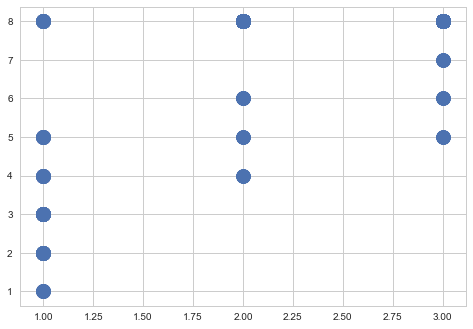

In [34]:
s=plt.scatter(training_data['Pclass']
               ,training_data['Cabin'],s=200 #the size of the dotts
             )

In [35]:
# this cell is wrong for the last assumption, the correction below 
'''### we take from that that there is no one from class 1 lives in the level (6, 7) , no one from class 2 lives in (7),
### no one from class 3 lives in (1, 2, 3, 4, 5)  (poor people)#workers''' 
x=1

### we can simply see that the 'calss 1 ' people lived in the upper Cabins(from 1 to ), and the 'class 2' people lived int the middle Cabins (from 4th to 6th), and the 'class 3' people (#poor or #workers) lived in the lower section (from 5th to 7th)  ||||| the 8th is the nans by the way 

 ### the plot shows the perfect vision between the Pclass and the Cabin features

In [36]:
pd.isnull(training_data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [37]:
training_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C


In [38]:
training_data[training_data['Pclass']==3].head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.250,8,S
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.925,8,S


In [39]:
print(len(training_data.Ticket.unique())) # haha , 681 unique numbers -_- #Cheesy

681


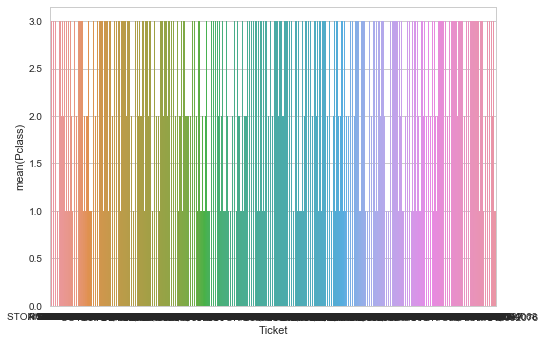

In [40]:
# i want the Pclass that got the same ticket to fill the nans 
sns.barplot(training_data['Ticket'],training_data['Pclass'],ci=None)

### i should look for something that might classify the Tickets if i can

In [41]:
# gotta do it later i guess 

In [42]:
# gotta implement the tf-idf for filling the nans 

#training_data.loc[training_data.loc['Name'][1]]
#training_data.loc[training_data['Sex']=='male','Sex']=1
#training_data.sort_values('Name')#['Name','Cabin','SibSp','Parch']
#(training_data['Ticket'].unique())#.sum()
#training_data

In [43]:
training_data[training_data['Pclass']==1].sort_values('Ticket').head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
257,258,1,1,"Cherry, Miss. Gladys",0,30.0,0,0,110152,86.50,2,S
504,505,1,1,"Maioni, Miss. Roberta",0,16.0,0,0,110152,86.50,2,S
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",0,33.0,0,0,110152,86.50,2,S
262,263,0,1,"Taussig, Mr. Emil",1,52.0,1,1,110413,79.65,5,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",0,39.0,1,1,110413,79.65,5,S


In [44]:
training_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,8,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,3,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,8,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,3,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,8,S
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,8,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,5,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,8,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,8,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,8,C


### is it just me or all the names are sorted by (Miss, Mr, Master, Rev ,Mrs,etc...

In [45]:
# done at the end of the code 

### the median is better than the mean for ages by the way. check :
https://stats.stackexchange.com/questions/2547/why-is-median-age-a-better-statistic-than-mean-age
### if you want to  know more 

### filling the nan on 'Age' for training and testing  data   (with median)

In [99]:
training_data['Age']=training_data['Age'].fillna(np.median(training_data[pd.notnull(training_data['Age'])]['Age']))
testing_data['Age']=testing_data['Age'].fillna(np.median(testing_data[pd.notnull(testing_data['Age'])]['Age']))

In [48]:
training_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            891
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       889
dtype: int64

### the Cabins count

In [49]:
unique=training_data.Cabin.unique()
for i in unique:
    print('Cabin',i)
    print(pd.notnull(training_data.loc[training_data['Cabin']==i,['Cabin']]).count())
# it is not clear if when never you rise 'Cabin' the numbers the count increase or not (because of the nans high density)

Cabin 8
Cabin    688
dtype: int64
Cabin 3
Cabin    59
dtype: int64
Cabin 5
Cabin    33
dtype: int64
Cabin 7
Cabin    4
dtype: int64
Cabin 4
Cabin    33
dtype: int64
Cabin 1
Cabin    15
dtype: int64
Cabin 2
Cabin    47
dtype: int64
Cabin 6
Cabin    12
dtype: int64


In [50]:
#sns.countplot(training_data['Ticket'],hue=training_data['Cabin'])
special=training_data[training_data['Cabin']==1]
meh=special.Ticket.unique()
print(meh)


#sns.countplot(training_data['Ticket'],hue=training_data['Cabin'])

#discovering if the similar tickets have a different cabins or not 
special=training_data[training_data['Cabin']==1]
meh=special.Ticket.unique()
special2=training_data[training_data['Cabin']==2]
meh2=special2.Ticket.unique()
print(meh2)
for i in meh:
    for x in meh2:
        if i==x:
            print('fail')
# the tickets are unique for every  the first two Cabin !
# the tickets AREN'T unique for every Pclass ! # i deleted the code 

['113788' 'PC 17754' '17764' '113767' '112277' '113056' '33638' '110465'
 '11755' '13049' 'PC 17485' '27042' '13213' '112050' 'PC 17590']
['PC 17569' '113509' '113572' 'PC 17558' 'PC 17593' '111240' 'PC 17610'
 '110152' '112059' '11967' 'PC 17608' '111361' 'PC 17477' '113760' '11771'
 '12749' '113050' '13568' 'WE/P 5735' '13567' '13214' 'F.C. 12750'
 'PC 17755' '24160' '17474' '112058' '695' '112053']


### from the cell above i made the claim that the tickets are different for different Cabins but i didn't check all the data so i fell in the mistake that i had to do the update for ... 

In [51]:
'''#converting the ages from float to int 
for x in range(len(training_data)):
    a=training_data.loc[x,'Fare']
    if(pd.notnull(a)):
        training_data.loc[x,'Fare']=int(a)
    
training_data.head(7)'''
# this was kind of stupid too 
x=1

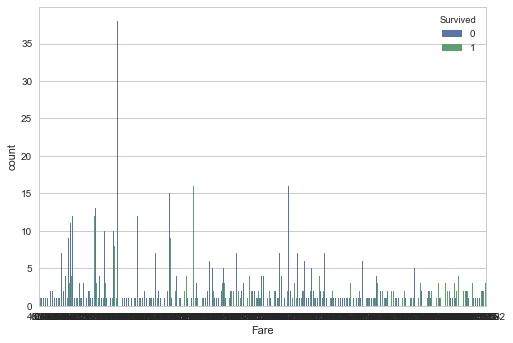

In [52]:
sns.countplot(training_data['Fare'],hue=training_data['Survived'])
#training_data['Fare'].unique()

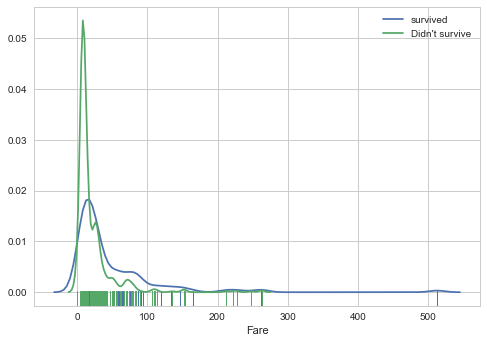

In [53]:
a=sns.distplot(training_data['Fare'][training_data['Survived']==1], hist=False,rug=True,label='survived')
b=sns.distplot(training_data['Fare'][training_data['Survived']==0], hist=False,rug=True,label='Didn\'t survive')
#a.set(ylabel='survival count ')

## barplot vs distplot

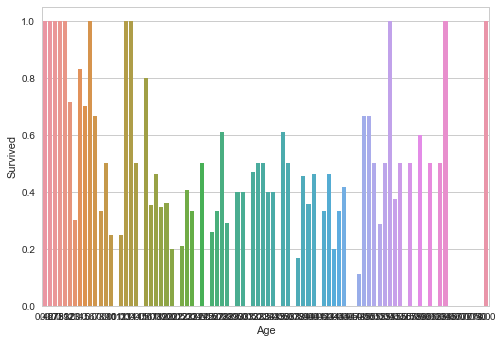

In [54]:
w=sns.barplot(training_data['Age'],training_data['Survived']==1,ci=None) # survived !
w.set(ylabel='Survived')

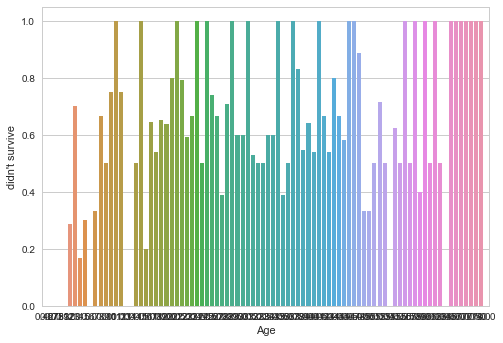

In [55]:
w=sns.barplot(training_data['Age'],training_data['Survived']==0,ci=None)
w.set( ylabel='didn\'t survive')

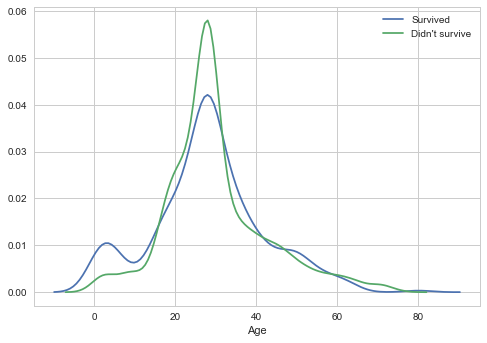

In [56]:
sns.distplot(training_data['Age'][training_data['Survived']==1],label='Survived', hist=False)
sns.distplot(training_data['Age'][training_data['Survived']==0], hist=False,label='Didn\'t survive')

# don't miss with the two next  plots bellow !!!!!

### the next plots are old (i divided the age for inrervals like (0,5,10,15,etc..) to see the general trends

In [100]:
# the code for making the 2 plots bellow 
# organizing the ages to a range that can be showed  # the difference is 5 now between every age 
'''for x in range(len(training_data)):
    a=training_data.loc[x,'Age']
    if(pd.notnull(a)):
        mod=a%10
        if(mod>2.5 and mod <7.5):
            a=a-mod
            a=a+5
        if (mod>=7.5):
            a=a-mod
            a=a+10
        if(mod<=2.5):
            a=a-mod
        training_data.loc[x,'Age']=a
'''
#well, that was stupid ! 
x=1   

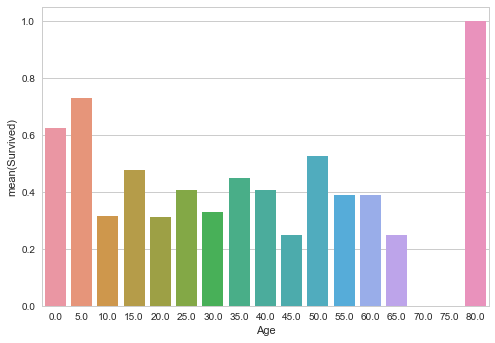

In [102]:
sns.barplot(training_data['Age'],training_data['Survived']==1,ci=None) # survived !


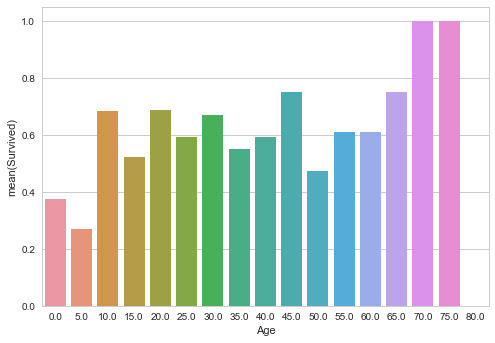

In [103]:
sns.barplot(training_data['Age'],training_data['Survived']==0,ci=None) # dead people ! 

In [60]:
print((training_data[training_data['SibSp']==0]['Age']).count())
print((training_data[training_data['SibSp']==1]['Age']).count())
print((training_data[training_data['SibSp']==2]['Age']).count())
print((training_data[training_data['SibSp']==3]['Age']).count())
print((training_data[training_data['SibSp']==4]['Age']).count())


608
209
28
16
18


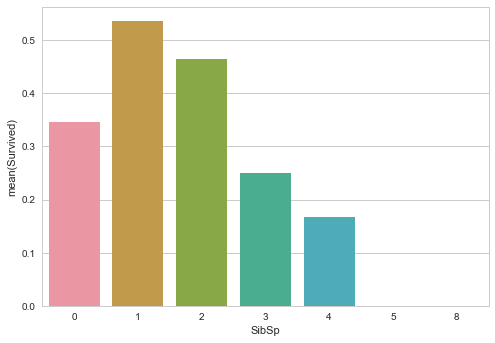

In [61]:
sns.barplot(training_data['SibSp'],training_data['Survived'],ci=None)

### the people with 1 sibiling have survived the most, then 2, etc..

### the max age is 80, the min age is 0.42 (half a year)

In [62]:
training_data.sort_values('Fare').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,8,S
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,8,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,8,S
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0,8,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,28.0,0,0,239853,0.0,8,S


### looking at the unique values for the columns 

In [63]:
print('survived : ', training_data.Survived.unique())
print('Sex : ',training_data.Sex.unique())  # 1 for male , 0 for female 
print('Pclass : ',training_data.Pclass.unique())#Ticket class
print('SibSp :',training_data.SibSp.unique())# of siblings / spouses aboard the Titanic
print('Embarked : ',training_data.Embarked.unique()) # Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton
print('Parch : ',training_data.Parch.unique())# of parents / children aboard the Titanic
print('Cabin :',training_data.Cabin.unique())

#print(training_data['Fare']) # the ticket cost  # bad idea ... 

survived :  [0 1]
Sex :  [1 0]
Pclass :  [3 1 2]
SibSp : [1 0 3 4 2 5 8]
Embarked :  ['S' 'C' 'Q' nan]
Parch :  [0 1 2 5 3 4 6]
Cabin : [8 3 5 7 4 1 2 6]


In [64]:
print(training_data['Fare'].mean())
print(np.median(training_data['Fare']))
print(training_data['Fare'].max(),'max')
print(training_data['Fare'].min(),'min')

#cutted=training_data.loc[training_data['Fare']>0]
#cutted=cutted.loc[training_data['Fare']<2]

#print(cutted['Fare'].mean())
#cutted.sort_values('Fare').head()

32.2042079685746
14.4542
512.3292 max
0.0 min


In [65]:
#plt.scatter(training_data['Pclass'],training_data['Fare'])
print(training_data['Fare'].max())
print(training_data['Fare'].min())
#print(training_data['Fare']/training_data['Fare'].sum())
print(training_data['Fare'].mean())
training_data.sort_values('Fare')
#x=training_data.loc[training_data['Fare']>500]
x=(training_data.loc[training_data['Fare']>500])
t=((training_data.loc[training_data['Fare']>200]))# & 
vv=((training_data.loc[training_data['Fare']<500]))#,3#,(500>training_data['Fare']>200),3]

512.3292
0.0
32.2042079685746


sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### looking for survivers vs not survivers 

In [66]:
print((training_data['Pclass']==1).sum()) #216
print((training_data['Pclass']==2).sum()) #184
print((training_data['Pclass']==3 ).sum())#/491 #491
s=((training_data.loc[training_data['Pclass']==3,'Survived']))
print(s.sum())

216
184
491
119


### by coding #training_data.Sex.plot('hist') # about 1/3 the ship were females and the others were males 
### training_data.Survived.plot('hist') # about 1/3 survived and the others died 

In [67]:
pd.isnull(training_data['Cabin']).sum()#687
whatever=training_data[pd.notnull(training_data['Cabin'])]#204
whatever.sort_values('Fare').head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,8,S
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,8,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,8,S
633,634,0,1,"Parr, Mr. William Henry Marsh",1,28.0,0,0,112052,0.0,8,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",1,28.0,0,0,239853,0.0,8,S


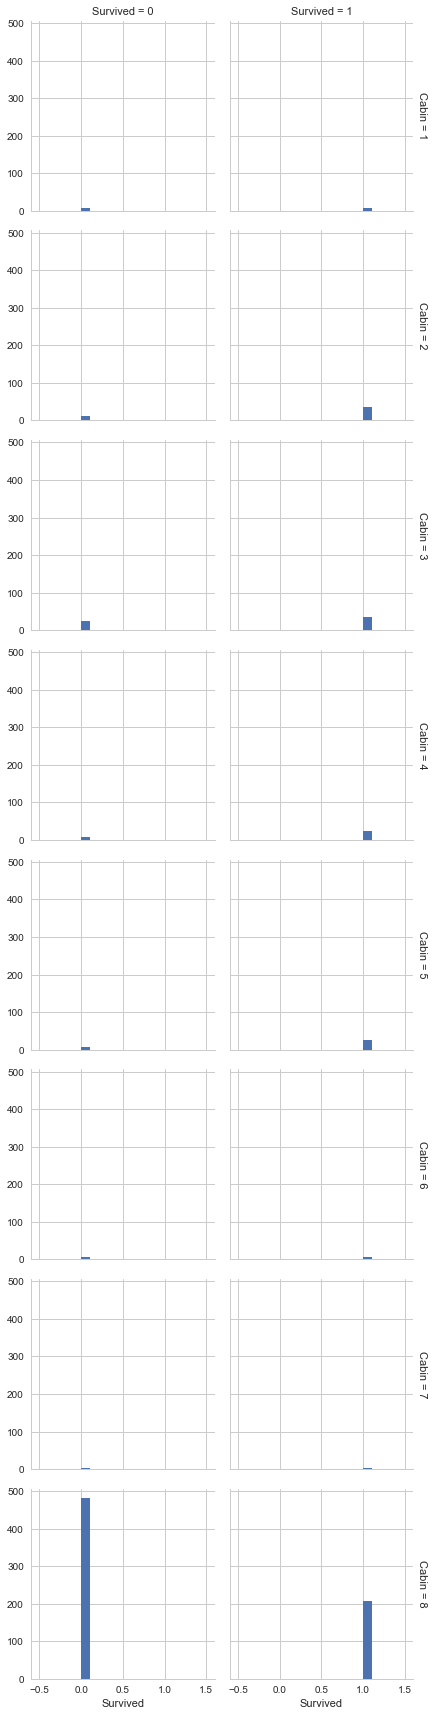

In [68]:
grid =sns.FacetGrid(training_data,row='Cabin',col='Survived',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Survived')

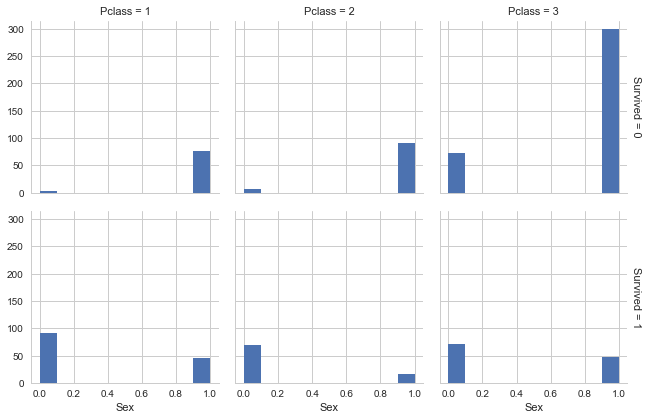

In [69]:
grid =sns.FacetGrid(training_data,row='Survived',col='Pclass',margin_titles=True) # FaceGrid : it makes the histograms ready in seaborn 
                                                # margin_titles : to make the titles show on like its a data frames ( on the side and top )
grid.map(plt.hist,'Sex')

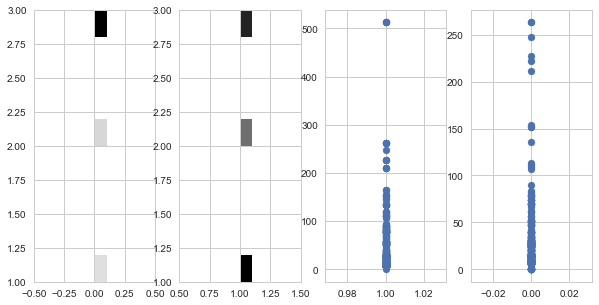

In [70]:
survive=training_data[training_data['Survived']==1]
died=training_data[training_data['Survived']==0]

fig,ax=plt.subplots(1,4,figsize=(10,5))
ax[1].hist2d(x=survive['Survived'],y=survive['Pclass'])
ax[0].hist2d(x=died['Survived'],y=died['Pclass'])

ax[2].scatter(survive['Survived'],survive['Fare'])
ax[3].scatter(died['Survived'],died['Fare'])


In [71]:
#plt.scatter(died['Survived'],died['Pclass'])

# remember what we did ? !

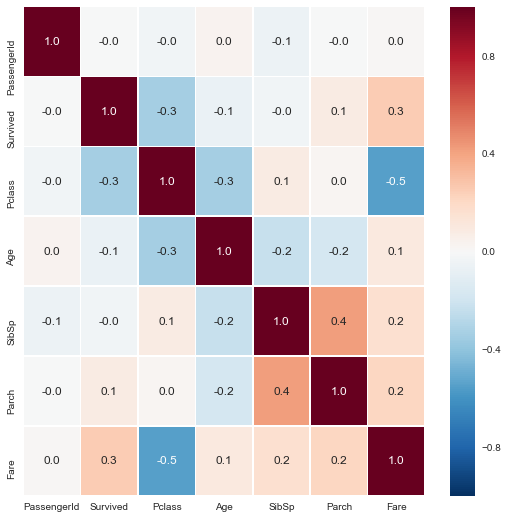

In [72]:
a,ax=plt.subplots(figsize=(9,9))
sns.heatmap(training_data.corr(),annot=True,linewidths=0.5,fmt='.1f',ax=ax)
#there is correlation between survived and (Pclass,Fare)

# thanks for listening  !!

### visualizing the 'Embarked' effect

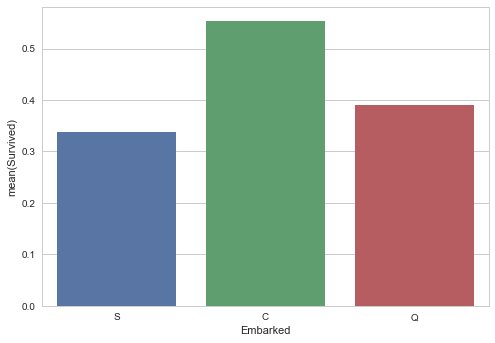

In [73]:
# the most and least 'Embarked' that the people survived on 
sns.barplot(training_data['Embarked'],training_data['Survived'],ci=False)

In [74]:
#make a list of the 2 datasets for the General changes 
full_data = [training_data, testing_data]

In [75]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          418 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### turning the Embarked into numbers (S to 1, Q to 2, C to 3)

In [76]:
training_data=training_data.dropna() # there is just 2 rows on the training that have nans on the Embarked ! 

In [77]:
for dataset in full_data:
    dataset['Embarked']=dataset['Embarked'].replace('S',np.int32(1))
    dataset['Embarked']=dataset['Embarked'].replace('Q',np.int32(2))
    dataset['Embarked']=dataset['Embarked'].replace('C',np.int32(3))


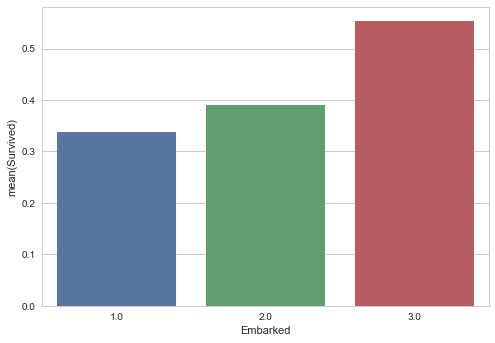

In [78]:
# the most and least 'Embarked' that the people survived on 
sns.barplot(full_data[0]['Embarked'],full_data[0]['Survived'],ci=False)

### Calssifying the names into "a useful feature" ('Title')

In [79]:
# Define get_title function to extract titles from passenger names

def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1) # 1 to erase the space befor the title
    return ""

#testing it..
get_title('Braund, Mr. Owen Harris')

NameError: name 're' is not defined

In [ ]:
# Create a new feature 'Title' that contains the titles of passenger names

for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
    del dataset['Name'] # delete the origional column 'Name' since we don't need it anymore 
    
    print(dataset.Title.unique())

In [ ]:
# Group all miss-spelled titles into their orgional titles

for dataset in full_data:

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
   # Mapping titles
    
    title_mapping = {}
    for i,title in enumerate(dataset['Title'].unique()):
        title_mapping[title] = i
    
    dataset['Title'] = dataset['Title'].map(title_mapping)
    
    
    print(title_mapping) # to check what exactly is hapenning 
# one for training_data and one for testing 

In [ ]:
# can you see what i see ?!
training_data,testing_data=full_data
training_data[training_data['Title']==11]
#the captin of the titanic didn't survive...

In [ ]:
sns.barplot(full_data[0]['SibSp'],full_data[0]['Survived'],ci=False)

In [ ]:
sns.barplot(full_data[0]['Parch'],full_data[0]['Survived'],ci=False)

In [ ]:
for dataset in full_data:
    dataset['relations']=dataset['SibSp']+dataset['Parch']

### so having relations have an effective percentage of the survival 

In [ ]:
sns.barplot(full_data[0]['relations'],full_data[0]['Survived'],ci=False)

In [ ]:
# for making a unique ticket names (can be done as a feature )
'''def trim_ticket(x):
    x=x.split(' ')
    if len(x)==1:
        x=x[0]
    elif len(x)==2:
        x=x[0]
    elif len(x)>2:
        x=x[0]+' '+x[1]
    return x
print(trim_ticket('STON/O 2. 3101288'))
print(trim_ticket('113803'))
for dataset in full_data:
    dataset['Ticket_Name']=dataset['Ticket'].apply(trim_ticket)'''
x=1

# testing if the data will work or won't on a model 

### make all the features but survived as x_train/x_test and the survived as y_train to predict the y_test
### lets try with a small chunk of the data

### btw there is nothing good or bad in this model i'm just testing if it will fit on the model or not ...

In [ ]:
'''
# trying to predict something lol 
logistic =LogisticRegression()

trying=training_data.copy()

#training_x : anything but Survived 
#training_y : Survived

training_y =trying.copy()
del training_y['Cabin'],training_y['Fare'],training_y['Ticket'],training_y['Parch'],training_y['SibSp'],training_y['Sex'],training_y['Age'],training_y['Name'],training_y['Pclass']

training_x=trying.copy()
del training_x['Survived'],training_x['Ticket'],training_x['Name'],training_x['Cabin'],training_x['Age']


logistic.fit(training_x,training_y.values.ravel())


training_y.head(3)  # just the index and the survived column 
training_x.head(3) # the columns here are : 'Pclass','Sex','SibSp','Parch','Fare'
testing_x=testing_data.copy()
del testing_x['Ticket'],testing_x['Name'],testing_x['Cabin'],testing_x['Age'],testing_x['index'],testing_x['Embarked'],te['PassengerId']
print('the training count is',training_data.Sex.count())
#testing_x.info() # there is 327 nans in the 'Cabin' ||  86 nans in the 'Age'  
#(pd.isnull(testing_x)).sum()
so from here i should make testing_x from the testing_data and try to predict the survived as testing_y
testing_y=logistic.predict(testing_x)
print(testing_y[1])
'''
x=1

### seems like i'm working properly to fit a model 

In [ ]:
survived_sex = training_data[training_data['Survived']==1]['Sex'].value_counts()
dead_sex = training_data[training_data['Survived']==0]['Sex'].value_counts()
df = pd.DataFrame([survived_sex,dead_sex])
df.index = ['Survived','Dead']
df.plot(kind='bar',stacked=True, figsize=(15,8))
plt.legend('FM')


### filling the only null value on full_fata ! 

In [ ]:
full_data[1][pd.isnull(full_data[1]['Fare'])==True]=full_data[1].Fare.median()